# Popular Data Science Questions 

In this project, we will analyze data from the Data Science Stack Exchange website to determine what people want to learn about in data science. This will help us make decisions on what to include in our courses.

On Data Science Stack Exchange (DSSE), users are able to post questions that:
* Are specific and on topic to the field of data science
* Are relevant to others
* Are practical and application-focused - not theoretical
* Users are asked to avoid posting subjective questions.

Any user can answer any question on DSSE - including their own questions!

DSSE's homepage is organized by questions, tags, users, and unanswered (questions which have not yet been answered). Users can search in the search bar, choose from recently trending questions, or browse questions by tag. Questions and answers can be voted up or down; the highest rated answers are promoted to the top of the post.

Within each post, the following information is displayed:
* Total upvotes and downvotes for the question
* Question title and text, along with username of the user who posted the question
* Tags with related topics (i.e. Python, machine-learning)
* Answers to the question, ranked according to their number of upvotes
* User comments on answers
* A space for you to enter your answer to the question

We can use the tags to determine how many questions are being asked about each data science topic. This will help us get a sense of what users want to learn more about, and which topics we should create content on.

## Stack Exchange Data Explorer

Stack Exchange provides a public data base for each of its websites. Exploring Data Science Stack Exchange's database (SEDE), there are several tables of interest:

* Tags
* TagSynonyms
* Posts
* PostTags

**Tags** immediately lets us know which tags have been used the greatest number of times (see table below). However, Tags does not tell us when the tag was used, so this may include outdated data which does not correspond to the most popular topics in 2019-2020. 

**TagSynonyms** tells us which tags have been renamed over time, and when they were renamed. 

**Posts** tells us the details about each specific post on DSSE, including any relevant tags, when the post was created, number of comments and views the post received, and its score. This information will help us identify which data science topics are currently in-demand from the community.

**PostTags** tells us the id of a post, as well as the relevant tag for that post.

Table of the top 10 most used tag names

Id  TagName          Count ExcerptPostId WikiPostId 
--- ---------------- ----- ------------- ---------- 
2   machine-learning 7723  4909          4908       
46  python           4478  5523          5522       
81  neural-network   3232  8885          8884       
194 deep-learning    3138  8956          8955       
77  classification   2098  4911          4910       
324 keras            2002  9251          9250       
128 scikit-learn     1478  5896          5895       
321 tensorflow       1431  9183          9182       
47  nlp              1341  147           146        
24  r                1206  49            48       

## Getting the Data

We will start by exploring the Posts table in more detail.

The PostTypeId tells us what category each post belongs to:

Id Name                
-- ------------------- 
1  Question            
2  Answer              
3  Wiki                
4  TagWikiExcerpt      
5  TagWiki             
6  ModeratorNomination                
7  WikiPlaceholder      
8  PrivilegeWiki       

We see that by far, the most popular post types are 1 and 2, which correspond to questions and answers. We will focus on analyzing questions, since that will tell us what data science topics community members want to learn about. We will narrow our scope further to look at question posts made in 2019, to ensure that we are focusing on current trends.

PostTypeId:  PostCount
---------- --------- 
1:  24200    
2:  26399    
4:   239      
5:   239      
6:   11       
7:   1        

Running the following query, we select relevant columns from all question posts made in 2019:

SELECT 
  Id,
  PostTypeId,
  CreationDate,
  Score,
  ViewCount,
  Tags,
  AnswerCount,
  FavoriteCount
FROM posts
WHERE PostTypeId = 1 AND CreationDate BETWEEN '2019-01-01 00:00:00' and '2020-01-01 00:00:00';

This query returns a total of 8,839 posts, which we will explore below.

## Exploring the Data

In [13]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline 

In [14]:
# Read data from file 
from google.colab import files
uploaded = files.upload()
data = pd.read_csv('2019_questions.csv', parse_dates=['CreationDate'])

In [15]:
# Explore the first few rows of our data
data.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


In [16]:
# Confirm size of data set - 8839 rows 
data.shape

(8839, 7)

## Cleaning the Data

Next, we will look for missing data. We will also reformat the `Tags` columns to make it easier to work with.

In [17]:
# Locate null values
data.isnull().sum()

Id                  0
CreationDate        0
Score               0
ViewCount           0
Tags                0
AnswerCount         0
FavoriteCount    7432
dtype: int64

The only column missing data is `FavoriteCount`. We will fill in 0 for missing values here, as these posts weren't favorited by anyone.

In [18]:
# Fill missing values with 0
data.fillna(value=0, inplace=True)

In [19]:
# Check data types are appropriate for each column
data.dtypes

Id                        int64
CreationDate     datetime64[ns]
Score                     int64
ViewCount                 int64
Tags                     object
AnswerCount               int64
FavoriteCount           float64
dtype: object

In [20]:
# Convert `FavoriteCount` to integers
data['FavoriteCount'] = data['FavoriteCount'].astype(int)

We will reformat the `Tags` column to make it easier to work with.

In [21]:
data['Tags'] = data['Tags'].str.replace('^<|>$', '').str.split('><')

In [22]:
# Confirm results
data.sample(5)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
5963,63506,2019-11-21 00:38:44,1,106,"[neural-network, backpropagation]",0,0
4507,51055,2019-04-28 12:28:06,1,123,[python],2,0
67,55923,2019-07-18 14:19:53,-1,33,"[machine-learning, linear-regression, linear-a...",1,0
562,56227,2019-07-23 10:16:56,0,64,"[neural-network, keras, regression]",1,0
7480,64510,2019-12-09 22:56:10,0,16,"[r, xgboost]",0,1


## Most Used and Most Viewed Tags

### Most Used Tags

First, we will find which tags were used the most frequently in 2019.

In [23]:
tags = {}
def count_tags(lis):
    for tag in lis:
        if not tag in tags:
            tags[tag] = 1
        else:
            tags[tag] += 1
    return tags    

In [24]:
data['Tags'].apply(count_tags)

0       {'machine-learning': 2693, 'data-mining': 217,...
1       {'machine-learning': 2693, 'data-mining': 217,...
2       {'machine-learning': 2693, 'data-mining': 217,...
3       {'machine-learning': 2693, 'data-mining': 217,...
4       {'machine-learning': 2693, 'data-mining': 217,...
                              ...                        
8834    {'machine-learning': 2693, 'data-mining': 217,...
8835    {'machine-learning': 2693, 'data-mining': 217,...
8836    {'machine-learning': 2693, 'data-mining': 217,...
8837    {'machine-learning': 2693, 'data-mining': 217,...
8838    {'machine-learning': 2693, 'data-mining': 217,...
Name: Tags, Length: 8839, dtype: object

In [25]:
tags_table = pd.DataFrame.from_dict(tags, orient='index')

In [26]:
tags_table.columns = ['use_count']

In [27]:
# Top 20 most used tags in 2019
tags_top_20 = tags_table.sort_values('use_count', ascending=False).head(20)
tags_top_20

,use_count
machine-learning,2693
python,1814
deep-learning,1220
neural-network,1055
keras,935
classification,685
tensorflow,584
scikit-learn,540
nlp,493
cnn,489


In [28]:
tags_top_20 = tags_top_20.sort_values(by='use_count')

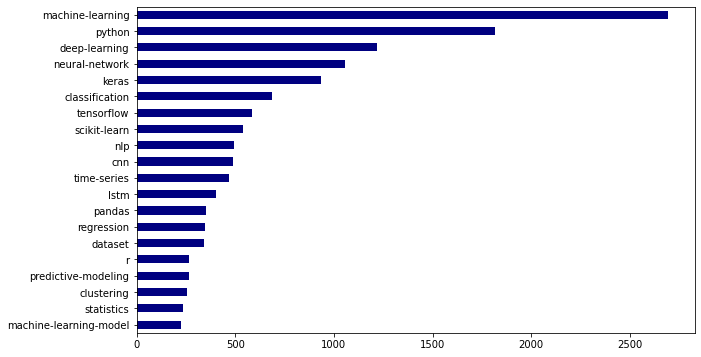

In [29]:
# Visualization of top 20 most used tags in 2019
tags_top_20.plot(kind='barh', figsize=(10,6), legend=False, color='navy')

The top 20 most used tags in from 2019 are displayed in the table and bar plot above. We can see that `machine-learning` was by far the most used tag, followed by `python`, `deep-learning`, `neural-network`, and `keras`. If we compare the most popular tags from 2019 with the most popular tags overall on DSSE, the top 5 are nearly identical: `machine-learning`, `python`, `neural-network`, `deep-learning`, and `classification`.

### Most Viewed Tags

Next, we will calculate which tags were the most used in 2019.

In [30]:
tag_view_dict = {}

def tag_views(x):
    for tag in x['Tags']:
        if not tag in tag_view_dict:
            tag_view_dict[tag] = x['ViewCount']
        else:
            tag_view_dict[tag] += x['ViewCount']

data.apply(tag_views, axis=1)

0       None
1       None
2       None
3       None
4       None
        ... 
8834    None
8835    None
8836    None
8837    None
8838    None
Length: 8839, dtype: object

In [31]:
tag_views = pd.DataFrame.from_dict(tag_view_dict, orient='index')
tag_views.columns = ['views']

In [32]:
tags_table = tags_table.join(tag_views, how='left')

In [33]:
tags_table.sort_values('views', ascending=False).head(20)

,use_count,views
python,1814,537585
machine-learning,2693,388499
keras,935,268608
deep-learning,1220,233628
pandas,354,201787
neural-network,1055,185367
scikit-learn,540,128110
tensorflow,584,121369
classification,685,104457
dataframe,81,89352


In [34]:
top_20_views = tags_table.sort_values('views').tail(20)

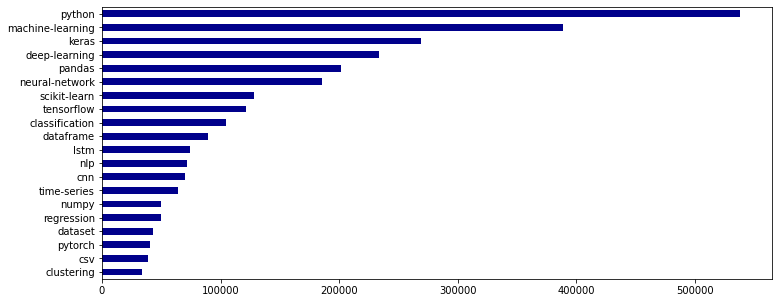

In [35]:
top_20_views['views'].plot(kind='barh', figsize=(12, 5), color='darkblue')

The most viewed tags are `python`, `machine-learning`, `keras`, `deep-learning`, and `pandas`. 
To better understand the relationship between most viewed and most viewed tags, let's visualize the most used and viewed tags side by side.

### Comparison of Most Used and Most Viewed Tags

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f80086a9748>],
      dtype=object)

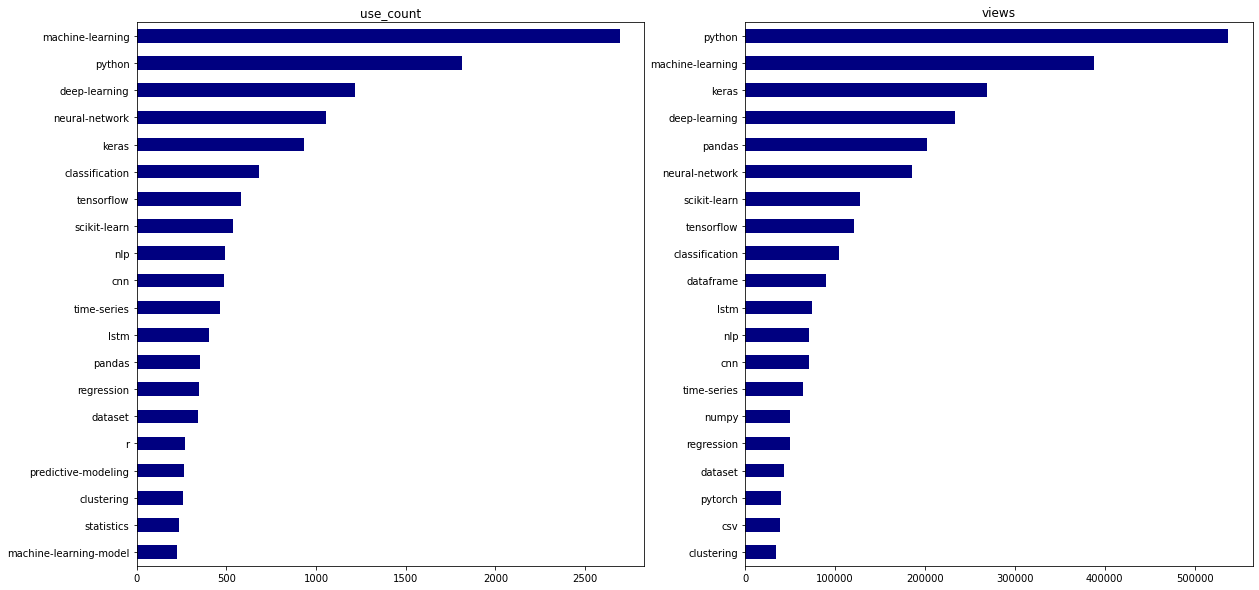

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((20, 10))
tags_top_20.plot(kind='barh', ax=axes[0], subplots=True, legend=False, color="navy")
top_20_views['views'].plot(kind='barh', ax=axes[1], subplots=True, color="navy")

Comparing the most viewed and most used tags side by side, we see that there is a good deal of overlap. `python`, `machine-learning`, `keras`, and `deep-learning` are the the top 5 tags for each list. However, there are also some differences - for example, the `pandas` tag is the 5th most viewed tag, but is used much less frequently in comparison. Next, we will use a table to compare which tags appear only in one of these top 20 lists.

In [37]:
# Create a table to view overlap between most used and most viewed tags
most_used = tags_top_20.merge(top_20_views, how='left', left_index=True, right_index=True)
most_used = most_used.drop(['use_count_y'], axis=1)
most_used.columns = ['use_count', 'view_count']
most_used.sort_values('use_count', ascending=False)

,use_count,view_count
machine-learning,2693,388499.0
python,1814,537585.0
deep-learning,1220,233628.0
neural-network,1055,185367.0
keras,935,268608.0
classification,685,104457.0
tensorflow,584,121369.0
scikit-learn,540,128110.0
nlp,493,71382.0
cnn,489,70349.0


From the table above, we see that 16 of the top 20 most used tags are also in the top 20 most viewed tag list. `r`, `predictive-modeling`, `statistics`, and `machine-learning-model` are in the top 20 most used tags, but not the top 20 most viewed tags list. In general, tags with a high use count also had a high use count. One notable exception to this is `pandas`, as noted above.

In [38]:
# Create a table to view overlap between most viewed and most used tags
most_viewed = top_20_views.merge(tags_top_20, how='left', left_index=True, right_index=True)
most_viewed.drop(['use_count_x'], axis=1, inplace=True)
most_viewed.columns = ['view_count', 'use_count']
most_viewed.sort_values('view_count', ascending=False)

,view_count,use_count
python,537585,1814.0
machine-learning,388499,2693.0
keras,268608,935.0
deep-learning,233628,1220.0
pandas,201787,354.0
neural-network,185367,1055.0
scikit-learn,128110,540.0
tensorflow,121369,584.0
classification,104457,685.0
dataframe,89352,NaN


From the table above, we see that there are 4 tags which fall in the top 20 most viewed tags, but are not in the the top 20 most used tags. These include `dataframe`, `numpy`, `pytorch`, and `csv`. `Pandas` is also ranked much higher in terms of views vs. usage. These 5 tags could represent topics that are undervalued, and should be explored as areas to create content on.

## Considering Favorites, Scores, and Answers

We can also consider post scores, number of favorites, and number of answers in our analysis of the most popular tags and topics. About half of posts have a score of 0, and the vast majority have 0 favorites. However, these variables are worth exploring as they may provide more insight into popular topics.

In [39]:
# Explore data
data['Score'].value_counts()

 0     4268
 1     2700
 2     1084
 3      357
 4      157
-1       84
 5       75
 6       42
 7       24
 8       15
-2       10
 9        8
 11       3
 10       3
 20       2
 12       1
 45       1
 26       1
 18       1
 14       1
 13       1
 15       1
Name: Score, dtype: int64

In [40]:
# Explore data
data['FavoriteCount'].value_counts()

0     7607
1      953
2      205
3       43
4       12
5        8
7        4
6        4
11       1
16       1
8        1
Name: FavoriteCount, dtype: int64

In [41]:
# Generalize tag_count function from above to use on other columns
def tag_count(x, col, dic):
    for tag in x['Tags']:
        if not tag in dic:
            dic[tag] = x[col]
        else:
            dic[tag] += x[col]

In [42]:
# Count total favorites and total scores for tags
tag_fav_dict = {}
data.apply(tag_count, col='FavoriteCount', dic=tag_fav_dict, axis=1)

tag_score_dict = {}
data.apply(tag_count, col='Score', dic=tag_score_dict, axis=1)

tag_answer_dict = {}
data.apply(tag_count, col='AnswerCount', dic=tag_answer_dict, axis=1)

# Convert to dataframes
fav_tags = pd.DataFrame.from_dict(tag_fav_dict, orient='index')
score_tags = pd.DataFrame.from_dict(tag_score_dict, orient='index')
tag_answer = pd.DataFrame.from_dict(tag_answer_dict, orient='index')
score_tags.columns=['Total']
fav_tags.columns=['Total']
tag_answer.columns=['Total']

In [43]:
# Top 20 favorited tags
top_20_fav = fav_tags.sort_values('Total', ascending=False).head(20)

# Top 20 scored tags
top_20_score = score_tags.sort_values('Total', ascending=False).head(20)

# Top 20 answered tags
top_20_answer = tag_answer.sort_values('Total', ascending=False).head(20)

In [44]:
# Comparison of top 20 favorited tags and top 20 used tags
tag_top_fav = top_20_fav.merge(tags_top_20, how='left', left_index=True, right_index=True)
tag_top_fav.columns=['Favorite_Count', 'Use_Count']
tag_top_fav

,Favorite_Count,Use_Count
machine-learning,575,2693.0
python,325,1814.0
deep-learning,266,1220.0
neural-network,227,1055.0
keras,181,935.0
classification,153,685.0
scikit-learn,113,540.0
cnn,100,489.0
time-series,97,466.0
nlp,94,493.0


From the table above, we see that there is a strong relationship between frequently used and frequently favorited tags. In general, the most frequently used tags are also the most favorited tags. However, we also see that there are 4 tags in the top 20 most favorited tags that are not in the top 20 most used tags: `image-classification`, `feature-selection`, `feature-engineering`, and `xgboost`. These topics are worth considering for content and course development, as users are demonstrating an interest in these topics by scoring them highly.

In [45]:
# Comparison of top 20 scored tags and top 20 used tags
tag_top_score = top_20_score.merge(tags_top_20, how='left', left_index=True, right_index=True)
tag_top_score.columns=['Total_Score', 'Use_Count']
tag_top_score

,Total_Score,Use_Count
machine-learning,2515,2693.0
python,1475,1814.0
deep-learning,1127,1220.0
neural-network,1021,1055.0
keras,785,935.0
classification,701,685.0
scikit-learn,507,540.0
nlp,455,493.0
cnn,452,489.0
tensorflow,417,584.0


From the table above, we see that there is a strong relationship between frequently used and highly scored tags. In general, the most frequently used tags are also the highest scored tags. However, we also see that there are 3 tags in the top 20 most favorited tags that are not in the top 20 most used tags: `image-classification`, `feature-selection`, and `data-mining`. These topics are worth considering for content and course development, as it appears that users are responding favorably to these topics and value this information enough to favorite it. `image-classification` and `feature-selection` are in both the top 20 scored and favorited lists, but not the top 20 most used tags list, so these topics may be undervalued and especially worth considering for content creation.

In [46]:
# Comparison of top 20 answered tags and top 20 used tags
tag_top_answer = top_20_answer.merge(tags_top_20, how='left', left_index=True, right_index=True)
tag_top_answer.columns=['Total_Answers', 'Use_Count']
tag_top_answer

,Total_Answers,Use_Count
machine-learning,2313,2693.0
python,1507,1814.0
deep-learning,877,1220.0
neural-network,824,1055.0
keras,654,935.0
classification,651,685.0
scikit-learn,518,540.0
pandas,394,354.0
nlp,369,493.0
cnn,362,489.0


Comparing the top 20 most used tags and the top 20 most answered tags, we see a great deal of overlap. In general, the most used tags are also the most answered tags.

## Relationships Between Tags

Using domain knowledge, we can also intuit that certain tags are more or less likely to be related. For example, we can look at the relation between the `pandas` tag and two popular languages used in data science: `r` and `python`. While there are 244 posts tagged with `pandas` and `python`, there are only 2 posts tagged with `pandas` and `r`. This is likely because Pandas is a Python library!

In [47]:
# Posts tagged `python` and `pandas`
data['Tags'].apply(lambda x: True if 'python' in x and 'pandas' in x else False).sum()

244

In [48]:
# Posts tagged `r` and `pandas`
data['Tags'].apply(lambda x: True if 'pandas' in x and 'r' in x else False).sum()

2

We will create a heatmap of the top 20 most used tags to better visualize this relation between different tags.

In [49]:
# Create a list of the top 20 most used tags
tag_list = list(tag_view_dict)

In [50]:
# Create empty association dataframe
association = pd.DataFrame(index=tag_list, columns=tag_list)
association.fillna(0, inplace=True)

# Loop through dataset to count how many times each pair of tags appears together
for tag in data['Tags']:
    association.loc[tag, tag] += 1

# Limit dataframe to show top 20 most used tags
association_most_used = association.loc[most_used.index, most_used.index]

In [51]:
for i in range(0,20):
    association_most_used.iloc[i,i] = pd.np.NaN

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


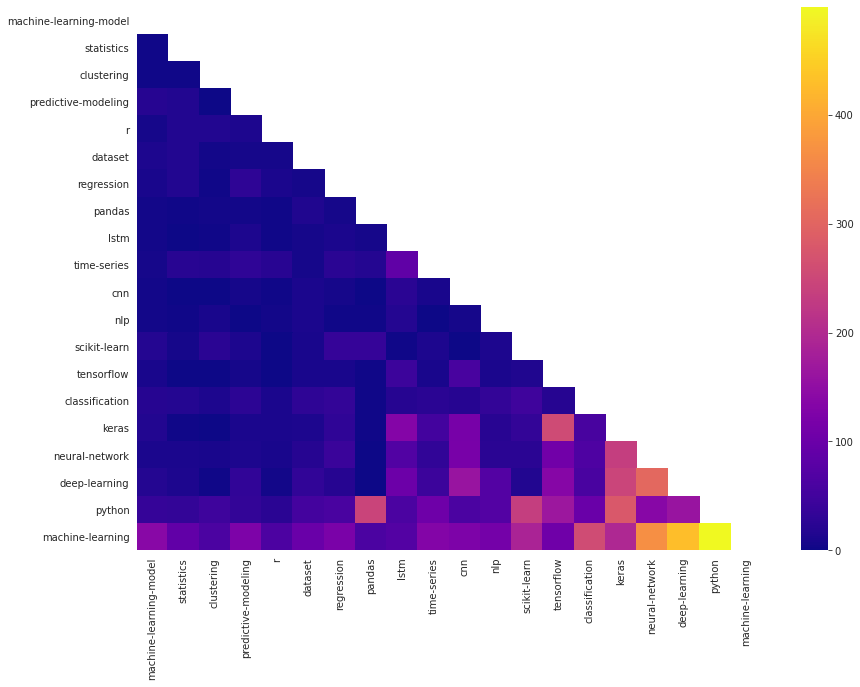

In [52]:
# Create heatmap
mask = np.zeros(association_most_used.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True

fig = plt.figure(figsize=(14,10))
sns.set_style('white')
sns.heatmap(association_most_used, cmap='plasma', mask=mask)

The lightest colors, corresponding to the tags that are most closely correlated with other tags, are clustered in the bottom right of the heatmap. However, these tags are also the most frequently used tags, so this may not reflect an actual relationship between the two tags, but rather their high popularity in general. For example, if we examine the row for `machine-learning`, we observe lighter colors all the way across, compared to other rows. Does this mean that the topic of machine learning is more closely related to all other data science topics, as compared with other tags? It may instead reflect that `machine-learning` was the most frequently used tag.

We can get a general sense of what topics users are interested in: Python and deep learning (as evidenced by `deep-learning`, `keras`, `neural-network`, `scikit-learn`, and `tensor-flow`).

## Niche Tags

We will further explore the association between tags to see if there are any less popular tags that have particularly strong associations, as these could represent more niche topics for content creation.

In [53]:
tags_table.shape

(526, 2)

In [54]:
tags_table[tags_table['use_count'] > 100].shape

(55, 2)

Out of 526 tags total, 55 have been used at least 100 times in 2019. We will narrow our focus to these tags, so that we are focusing on tags which are reasonably popular.

In [55]:
# Filter for most used tags
tags_100_use = tags_table[tags_table['use_count'] > 100]
tag_100_use_list = list(tags_100_use.index)

# Create a dataframe with the associations of these tags
tags_percent = association.loc[tag_100_use_list, tag_100_use_list]

In [56]:
# Create a dataframe showing how often tags are association as a percentage of total times the tag is used
tags_percent_total = tags_percent.merge(tags_table, how='left', left_index=True, right_index=True)
tags_percent_total.drop(['views'], inplace=True, axis=1)
tags_percent_copy = tags_percent_total.div(tags_percent_total['use_count'], axis=0)
tags_percent_copy

,machine-learning,data-mining,regression,linear-regression,python,time-series,scikit-learn,dataset,data,deep-learning,keras,cnn,nlp,clustering,pandas,numpy,decision-trees,reinforcement-learning,neural-network,image-classification,r,logistic-regression,predictive-modeling,lstm,tensorflow,data-cleaning,object-detection,recommender-system,text-mining,word-embeddings,machine-learning-model,xgboost,classification,training,statistics,rnn,convnet,autoencoder,visualization,natural-language-process,pytorch,feature-engineering,data-science-model,feature-selection,multiclass-classification,loss-function,convolution,random-forest,computer-vision,prediction,preprocessing,svm,optimization,cross-validation,unsupervised-learning,use_count
machine-learning,1.000000,0.035277,0.044189,0.025251,0.185295,0.048645,0.069811,0.036762,0.020052,0.159302,0.072410,0.046045,0.041961,0.022651,0.023023,0.008912,0.020423,0.018567,0.135908,0.025251,0.023394,0.020795,0.045674,0.026365,0.039361,0.015225,0.008912,0.015225,0.010026,0.008912,0.051615,0.023023,0.096175,0.016710,0.033049,0.014482,0.010026,0.007798,0.005199,0.013739,0.009283,0.026736,0.033049,0.032677,0.011140,0.012997,0.010397,0.018938,0.014111,0.014853,0.013368,0.019681,0.018195,0.014853,0.018195,1.0
data-mining,0.437788,1.000000,0.013825,0.004608,0.124424,0.050691,0.009217,0.138249,0.105991,0.110599,0.004608,0.009217,0.036866,0.013825,0.046083,0.013825,0.027650,0.000000,0.018433,0.000000,0.046083,0.023041,0.110599,0.004608,0.000000,0.129032,0.000000,0.027650,0.078341,0.000000,0.023041,0.009217,0.087558,0.000000,0.041475,0.009217,0.000000,0.000000,0.055300,0.004608,0.000000,0.027650,0.041475,0.059908,0.004608,0.000000,0.000000,0.009217,0.000000,0.013825,0.046083,0.013825,0.004608,0.009217,0.009217,1.0
regression,0.342939,0.008646,1.000000,0.100865,0.170029,0.069164,0.106628,0.017291,0.017291,0.060519,0.089337,0.017291,0.005764,0.005764,0.017291,0.002882,0.025937,0.000000,0.121037,0.002882,0.028818,0.040346,0.080692,0.031700,0.025937,0.005764,0.002882,0.002882,0.000000,0.002882,0.023055,0.048991,0.097983,0.005764,0.046110,0.005764,0.000000,0.002882,0.008646,0.000000,0.011527,0.034582,0.020173,0.043228,0.002882,0.031700,0.002882,0.028818,0.002882,0.023055,0.014409,0.005764,0.011527,0.023055,0.000000,1.0
linear-regression,0.388571,0.005714,0.200000,1.000000,0.171429,0.057143,0.154286,0.011429,0.011429,0.022857,0.040000,0.000000,0.005714,0.011429,0.017143,0.017143,0.022857,0.000000,0.080000,0.000000,0.034286,0.028571,0.045714,0.000000,0.011429,0.005714,0.000000,0.005714,0.000000,0.005714,0.034286,0.028571,0.022857,0.005714,0.011429,0.005714,0.000000,0.000000,0.005714,0.000000,0.005714,0.022857,0.022857,0.028571,0.005714,0.011429,0.000000,0.022857,0.000000,0.022857,0.005714,0.017143,0.011429,0.005714,0.005714,1.0
python,0.275083,0.014884,0.032525,0.016538,1.000000,0.057883,0.129548,0.029217,0.019294,0.088203,0.154355,0.034179,0.039140,0.024807,0.134509,0.039140,0.012128,0.009372,0.075524,0.013230,0.013230,0.016538,0.019294,0.033627,0.092062,0.020397,0.012128,0.007718,0.012128,0.003859,0.020397,0.015987,0.054024,0.005513,0.019294,0.008820,0.009923,0.012128,0.019294,0.007166,0.022602,0.010474,0.023153,0.014333,0.012679,0.007718,0.004961,0.013782,0.012128,0.011025,0.012679,0.012128,0.009923,0.013230,0.011577,1.0
time-series,0.281116,0.023605,0.051502,0.021459,0.225322,1.000000,0.025751,0.012876,0.012876,0.094421,0.109442,0.017167,0.000000,0.042918,0.040773,0.008584,0.000000,0.004292,0.070815,0.000000,0.047210,0.004292,0.066524,0.186695,0.019313,0.008584,0.000000,0.004292,0.000000,0.000000,0.015021,0.008584,0.053648,0.017167,0.047210,0.055794,0.002146,0.006438,0.010730,0.000000,0.006438,0.019313,0.019313,0.012876,0.008584,0.004292,0.008584,0.012876,0.000000,0.034335,0.017167,0.002146,0.002146,0.008584,0.017167,1.0
scikit-learn,0.348148,0.003704,0.068519,0.050000,0.435185,0.022222,1.000000,0.016667,0.007407,0.029630,0.062963,0.000000,0.022222,0.044444,0.068519,0.022222,0.055556,0.000000,0.044444,0.001852,0.0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until


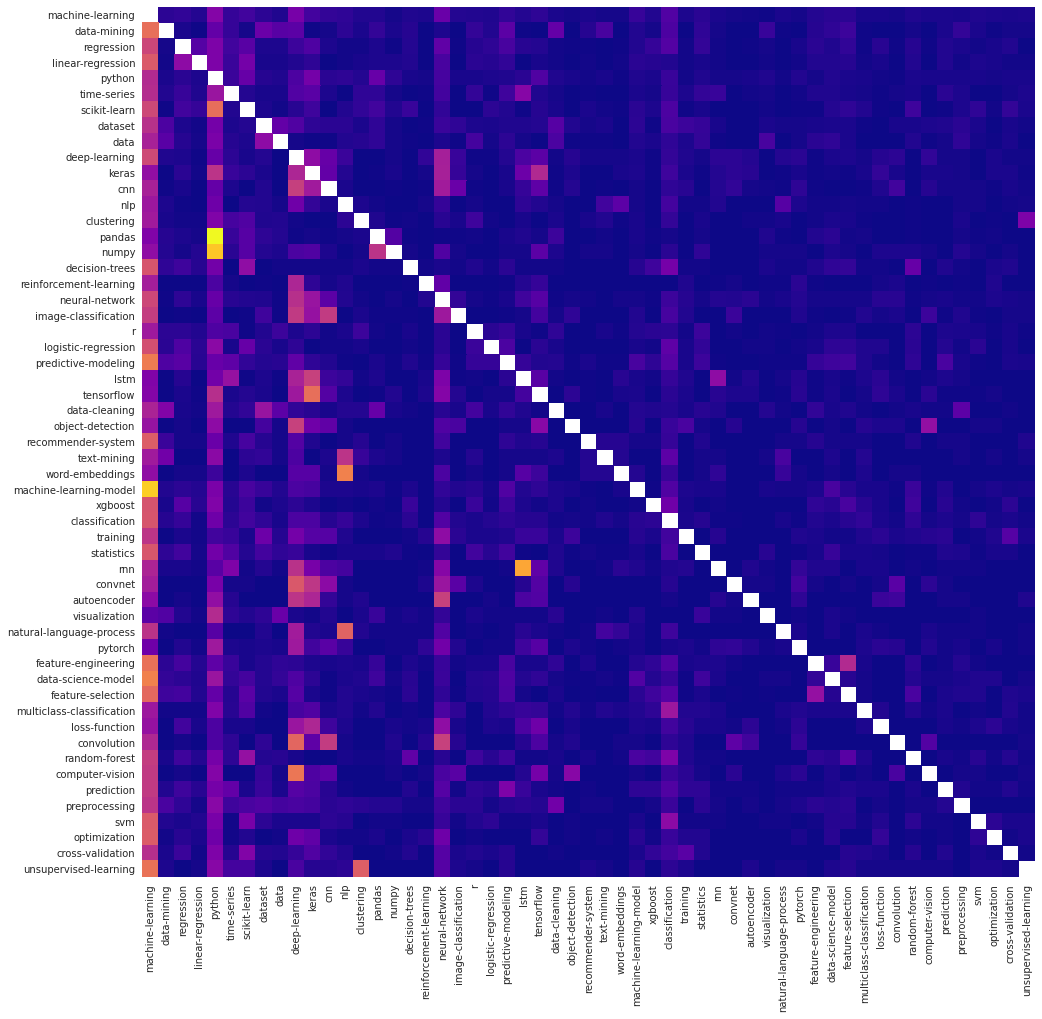

In [57]:
# Create heatmap of tag associations as a percentage of total tag uses
for i in range(len(tag_100_use_list)):
    tags_percent_copy.iloc[i,i] = pd.np.NAN
    
tags_percent_copy.drop('use_count', axis=1, inplace=True)

fig = plt.figure(figsize=(16,16))
sns.heatmap(tags_percent_copy, cmap='plasma', cbar=False)

We can see that across the board, tags are used very frequently with `machine-learning` `python`, `deep-learning`, and `keras`. This is not surprising, as these represent some of the most popular tags. We can see some other specific instances where specific tags are often used together. To better visualize this, we will filter for the heatmap for only instances where the association between two tags is at least 20% of total use cases.

In [58]:
tags_high_assoc = tags_percent_copy[tags_percent_copy >.2].dropna(how='all').dropna(how='all', axis=1)

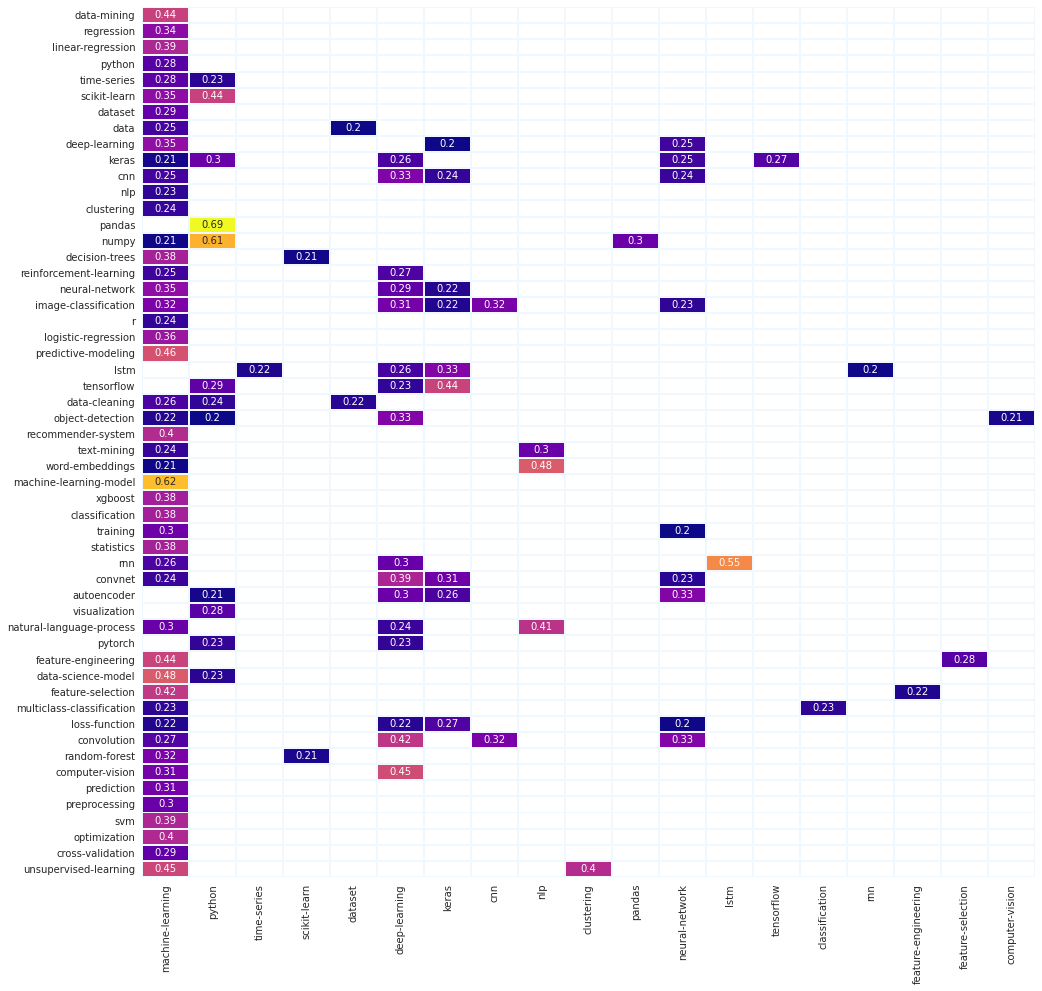

In [59]:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(16,16))
sns.heatmap(tags_high_assoc, cmap='plasma', annot=True, linewidths=1, cbar=False, linecolor='aliceblue')

We can now make some observations about notable associations between specific tags:
* 69% of the time the `pandas` tag is used, it is used with `python`. 
* 55% of the time the `mn` tag is used, it is used with `ltsm`
* 48% of the time the `word-embeddings` tag is used, it is used with `nlp`
* 44% of the time the `feature-engineering` tag is used, it is used with `machine-learning`
* 42% of the time the `feature-selection` tag is used, it is used with `machine-learning`


Et cetera. 

This information could be used to:
* Determine what type of content to create for specific topics. For example, there may not be enough demand to warrant creating a full course on all the topics above, but perhaps a blog post, Youtube video, etc targeting two topics or keywords that are closely associated (i.e. `deep-learning` and `convolution`) would attract an audience. 


* Determine what subtopics to include in a larger course. For example, in a course on machine learning, we may want to include the topics of feature selection and feature engineering, as these topics were closely associated and from our earlier analysis, there seemed to be a high demand for more information on these topics. Or, in a course on `nlp`, including a section on `word-embeddings`. Using these keywords in course descriptions could help differentiate our course offerings from those of competitors.

## Deep Learning - Just A Fad?

We know that deep learning was one of the most popular topics on DSSE in 2019 - but is this a just a fad? Since we want our content to stay relevant, this is an important consideration. Next, we will expand our search from just question posts made in 2019 to all questions posts made on DSSE, and compare the interest in deep learning over time.

Looking at the top 20 most used tags in 2019, the following are related to deep learning: `deep-learning`, `keras`, `neural-network`, `scikit-learn`, `tensor-flow`, `ltsm`, and `cnn`. We will compare the popularity of these tags over time to better understand the interest in deep learning over time.

In [ ]:
# Read in and preview data
uploaded = files.upload()
allq = pd.read_csv('all_questions.csv', parse_dates=['CreationDate'])

In [67]:
allq.sample(5)

,Id,CreationDate,Tags
14808,31344,2018-05-07 20:01:01,"[deep-learning, word2vec, text]"
1175,518,2014-06-21 10:55:41,"[machine-learning, clustering]"
6801,48459,2019-04-02 16:32:16,"[machine-learning, python]"
17546,63805,2019-11-26 15:10:03,"[deep-learning, classification, optimization, ..."
18487,33092,2018-06-13 14:04:44,"[variance, glorot-initialization]"


In [65]:
# Clean `Tags` column for ease of analysis
allq['Tags'] = allq['Tags'].str.replace('^<|>$', '').str.split('><')

In [66]:
# Size of total dataset
allq.shape

(21576, 3)

In [68]:
# Define our list of deep learning related tags
deep_list = ['deep-learning', 'keras', 'neural-network', 'cnn', 'ltsm', 'tensor-flow', 'scikit-learn']

In [69]:
# Classify tags as deep learning related
def deep(tags):
    for tag in tags:
        if tag in deep_list:
            return 1
    else:
        return 0

In [70]:
allq['Deep_Learning'] = allq['Tags'].apply(deep)

Now that we have classified posts as deep learning related, we will categorize posts by creation date. We will categorize posts by the year and quarter in which they were created. This will give us a more nuanced view of trends around deep learning over time as opposed to just categorizing by year, while still providing a big-picture sense of how interest has changed over time.

In [85]:
# Extract year to separate column
import datetime as dt
allq['Year'] = allq['CreationDate'].dt.year

In [86]:
allq.sample(5)

,Id,CreationDate,Tags,Deep_Learning,Quarter,Year
16009,23382,2017-09-28 10:25:11,"[predictive-modeling, word-embeddings, matrix-...",0,Q3,2017
14782,31288,2018-05-06 15:01:38,"[machine-learning, classification, regression,...",0,Q2,2018
4742,4967,2015-01-28 13:42:15,"[time-series, regression, categorical-data]",0,Q1,2015
8360,49160,2019-04-11 22:24:53,"[python, time-series, pandas]",0,Q2,2019
9960,60663,2019-09-23 22:27:30,"[machine-learning, python, neural-network, tim...",1,Q3,2019


Since we will be classifying dates by quarter, we'll need to make sure the data set includes only full quarters to get an accurate picture. We will identify the earlies and latest dates in the dataset, and then exclude any extra months which fall outside of this range.

In [87]:
allq['CreationDate'].sort_values().head(5)

1610   2014-07-01 13:44:23
1611   2014-07-01 17:03:31
1612   2014-07-02 13:40:27
1613   2014-07-02 14:40:55
1614   2014-07-02 16:41:47
Name: CreationDate, dtype: datetime64[ns]

In [88]:
allq['CreationDate'].sort_values().tail(5)

20299   2019-12-31 13:25:01
20300   2019-12-31 14:15:54
20301   2019-12-31 14:59:18
20302   2019-12-31 16:08:06
20303   2019-12-31 18:08:12
Name: CreationDate, dtype: datetime64[ns]

The earliest date in the dataset is 5/13/2014. Therefor, we will include dates from Q3 2014 onwards. The latest date in the dataset is 1/19/2020, so we will include dates up through the end of Q4 2019.

In [89]:
# Filter for desired date range
allq = allq[(allq['CreationDate'] < '2020-01-01') & (allq['CreationDate'] >= '2014-07-01')]

In [90]:
# Verify results
allq['CreationDate'].sort_values().head(5)

1610   2014-07-01 13:44:23
1611   2014-07-01 17:03:31
1612   2014-07-02 13:40:27
1613   2014-07-02 14:40:55
1614   2014-07-02 16:41:47
Name: CreationDate, dtype: datetime64[ns]

In [91]:
# Verify results
allq['CreationDate'].sort_values().tail(5)

20299   2019-12-31 13:25:01
20300   2019-12-31 14:15:54
20301   2019-12-31 14:59:18
20302   2019-12-31 16:08:06
20303   2019-12-31 18:08:12
Name: CreationDate, dtype: datetime64[ns]

Next, we will add a column to classify the dates into Q1, Q2, Q3, and Q4.

In [92]:
def quarter(creation_date):
    mon = creation_date.month
    if mon <= 3:
        return 'Q1'
    elif mon <= 6:
        return 'Q2'
    elif mon <= 9:
        return 'Q3'
    else:
        return 'Q4'

In [93]:
allq['Quarter'] = allq['CreationDate'].apply(quarter)

In [94]:
# Verify results
allq.sample(5)

,Id,CreationDate,Tags,Deep_Learning,Quarter,Year
12599,30313,2018-04-14 12:39:21,"[machine-learning, predictive-modeling, perfor...",0,Q2,2018
7623,40729,2018-11-05 06:43:35,"[machine-learning, feature-selection, feature-...",0,Q4,2018
19538,33791,2018-06-29 06:44:36,"[neural-network, gradient-descent, backpropaga...",1,Q2,2018
5542,57738,2019-08-18 05:20:35,"[python, classification, keras, tensorflow]",1,Q3,2019
5831,5558,2015-04-20 15:18:38,"[machine-learning, time-series]",0,Q2,2015


Next, we will aggregate the data to count the number of total posts versus deep learning related posts for each quarter. The table below shows this aggregation, as well as what percentage of posts from that quarter were deep learning related.

In [95]:
# Strategy 1: Use groupby to aggregate data as described above
time_group = allq.groupby(['Year', 'Quarter'])['Deep_Learning'].agg(['sum', 'size'])
time_group.columns = ['Deep_Learning', 'Total_Posts']
time_group['Percent_DL'] = round(time_group['Deep_Learning'] / time_group['Total_Posts'] * 100, 2)
time_group

Deep_Learning  Total_Posts  Percent_DL
Year Quarter                                        
2014 Q3                  13          189        6.88
     Q4                  21          216        9.72
2015 Q1                  18          190        9.47
     Q2                  28          284        9.86
     Q3                  45          311       14.47
     Q4                  64          382       16.75
2016 Q1                 106          516       20.54
     Q2                 107          518       20.66
     Q3                 153          585       26.15
     Q4                 164          527       31.12
2017 Q1                 224          698       32.09
     Q2                 209          647       32.30
     Q3                 229          714       32.07
     Q4                 333          898       37.08
2018 Q1                 521         1221       42.67
     Q2                 523         1448       36.12
     Q3                 637         1512       42.13
     Q4                 495         1294       38.25
2019 Q1                 708         1987       35.63
     Q2                 852         2393       35.60
     Q3                 848         2394       35.42
     Q4                 751         2036       36.89

In [96]:
# Reset index and add 'YQ' (Year-Quarter) column for purposes of plotting data
time_group.reset_index(inplace=True)
time_group['YQ'] = time_group['Year'].astype(str).str[2:] + time_group['Quarter']

In [97]:
# Find length of dataset for graphing - bins for x axis
time_group.shape

# Convert 'YQ' column to a list to use for x axis labels
quarters = list(time_group['YQ'])

# Format for graphing
time_group_p = time_group[['Percent_DL','YQ']].copy()
time_group_p.set_index('YQ', inplace=True)

(0.0, 21.0)

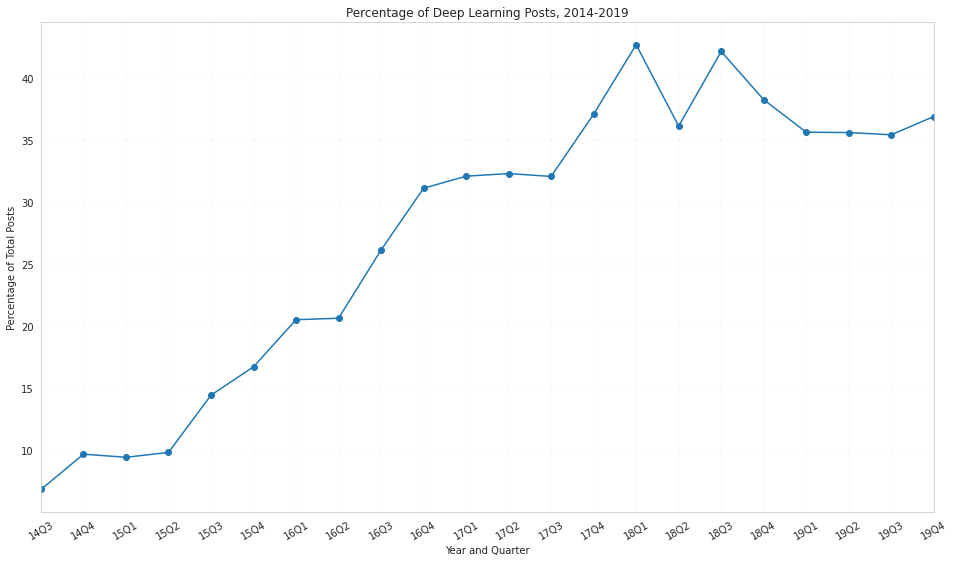

In [181]:
# Graph percentage of deep learning posts by quarter
plt.figure(figsize=(16,9))
plt.plot(time_group_p, marker='o')
plt.xlabel('Year and Quarter')
plt.ylabel('Percentage of Total Posts')
plt.title('Percentage of Deep Learning Posts, 2014-2019')
plt.xticks(rotation=30)
plt.grid(True, color='b', lw=.1)
plt.xlim('14Q3', '19Q4')

Text(0.5, 1.0, 'Deep Learning vs. All Posts: 2014-2019')

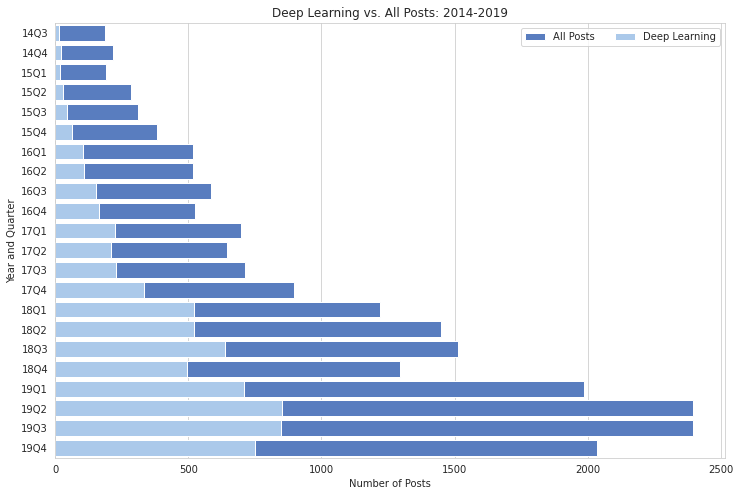

In [99]:
# Graph the deep learning vs. total number of posts per quarter
fig, ax = plt.subplots(figsize=(12, 8))

sns.set_color_codes('muted')
sns.barplot(x='Total_Posts', y='YQ', data=time_group, color='b', label='All Posts')

sns.set_color_codes('pastel')
sns.barplot(x='Deep_Learning', y='YQ', data=time_group, color='b', label='Deep Learning')
ax.set_ylabel('Year and Quarter')
ax.set_xlabel('Number of Posts')
ax.legend(ncol=2, loc='upper right', frameon=True)
ax.set_title('Deep Learning vs. All Posts: 2014-2019')

From the table and line graph above, we can see that the percentage of deep learning related posts increased steeply from 2014 to 2017, and has since plateaued at approximately 35% of question posts. Looking at the number of deep learning related vs. all posts, we see that while the *percentage* of deep learning posts has plateaued, the *number* of deep learning related posts has continued to increase along with the increase in overall post numbers.

# Related Content - Statistics

Data science is an interdisciplinary field, and knowledge of statistics is vital. Of the top 20 most used tags on DSSE, at least 4 are closely statistics-related: `statistics`, `r`, `time-series`, and `regression`. When determining what new content to create, we can expand our analysis beyond Data Science Stack Exchange to also include data from Cross Validated Stack Exchange. Cross Validated's landing page says it is "a question and answer site for people interested in statistics, machine learning, data analysis, data mining, and data visualization". We can use Stack Exchange's Data Explorer to do a similar analysis Cross Validated's data, and identify any additional topics we may want to consider.

In [100]:
# Upload file
uploaded = files.upload()
qsa = pd.read_csv('QueryResults.csv',  parse_dates=['CreationDate'])

Saving QueryResults.csv to QueryResults (2).csv


In [103]:
# Explore data
qsa.head()

,Id,PostTypeId,CreationDate,Score,Tags,FavoriteCount,ViewCount,AnswerCount
0,445570,1,2020-01-20 05:10:32,0,<r><time-series><data-visualization><matlab>,NaN,18,0
1,445572,1,2020-01-20 05:50:19,2,<clustering><outliers>,1.0,12,0
2,445573,1,2020-01-20 06:02:14,1,<likelihood-ratio><weibull><numerics><frailty>,NaN,39,0
3,445574,1,2020-01-14 23:14:36,0,<machine-learning>,NaN,22,0
4,445576,1,2020-01-20 06:49:39,0,<time-series><stochastic-processes><unevenly-s...,NaN,16,0


In [104]:
# Explore data
qsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             50000 non-null  int64         
 1   PostTypeId     50000 non-null  int64         
 2   CreationDate   50000 non-null  datetime64[ns]
 3   Score          50000 non-null  int64         
 4   Tags           50000 non-null  object        
 5   FavoriteCount  17435 non-null  float64       
 6   ViewCount      50000 non-null  int64         
 7   AnswerCount    50000 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 3.1+ MB


Similar to above, the only data missing is in the `FavoriteCount` column. We will fill in missing values with 0, as a null value here means that the post does not have any favorites.


In [105]:
# Fill missing values in 'FavoriteCount' with 0
qsa['FavoriteCount'].fillna(0, inplace=True)

In [106]:
# Clean 'Tags' column
qsa['Tags'] = qsa['Tags'].str.replace('^<|>$', '').str.split('><')

In [107]:
# Count all tags
tag_dict = {}

def tag_count(tags):
  for tag in tags:
    if not tag in tag_dict:
      tag_dict[tag] = 1
    else:
      tag_dict[tag] += 1

qsa['Tags'].apply(tag_count)

0        None
1        None
2        None
3        None
4        None
         ... 
49995    None
49996    None
49997    None
49998    None
49999    None
Name: Tags, Length: 50000, dtype: object

In [108]:
# Make a table with how often each tag is used
tag_table = pd.DataFrame.from_dict(tag_dict, orient='index')

In [109]:
# Rename column in tag_table to 'use_count'
tag_table.columns=['use_count']

In [110]:
# Sort values in tag_table in descending order, with the most used at the top
tag_table.sort_values('use_count', ascending=False, inplace=True)

In [111]:
# There are 1374 tags total 
tag_table.shape

(1374, 1)

In [120]:
# These are the top 20 most used tags on Cross Validated
qsa_top_20 = tag_table.head(20)

In [123]:
# Overlap between the top 20 tags on Cross Validated and DSSE
tag_qsa_dsse = qsa_top_20.merge(tags_top_20, how='left', left_index=True, right_index=True)
tag_qsa_dsse.columns=['CV_use_count','DSSE_use_count']
tag_qsa_dsse

,CV_use_count,DSSE_use_count
r,7118,268.0
regression,6497,347.0
machine-learning,4575,2693.0
time-series,3322,466.0
probability,2776,NaN
hypothesis-testing,2261,NaN
distributions,2228,NaN
self-study,2082,NaN
bayesian,1819,NaN
neural-networks,1815,NaN


6 out of the top 20 tags on Cross Validated are also top tags on Data Science Stack Exchange. Given the demand for these topics on both forums, we may want to consider emphasizing the statistical skills when creating articles or courses on this content. For example, when writing a machine learning related course, we may want to focus on the statistical concepts that serve as a foundation for models. In addition, we could consider developing courses or modules on some of these topics, including:
*  Time series analysis, as this topic is ranked highly on both forums. 
*  A basic statistics overview in the context of data analysis would also be an area for course development - popular tags include `probability`,  `distributions`, `normal-distribution`, `correlation`, `regression`, and `statistical-significance`.
*  R-based data analysis courses, as `r` was a popular tag on both forums
*  Hypothesis testing and statistical significance, in the context of data analysis. This could focus on specific fields where these skills are applied (i.e. healthcare, business).

Next, we will take a closer look at how often popular Cross Validated tags appear together.

In [114]:
# Create a dataframe for tag associations and count how often two tags appear together
tag_association = pd.DataFrame(index=tag_table.index, columns=tag_table.index)
tag_association.fillna(0, inplace=True)

for tag in qsa['Tags']:
  tag_association.loc[tag, tag] += 1

# Restrict the table to include only the top 20 most used tags
top_tags = tag_association.loc[tag_table.index[:20], tag_table.index[:20]]
top_tags = top_tags.merge(tag_table, how='left', left_index=True, right_index=True)

In [115]:
# View how often the top 20 Cross Validated tags appear together
top_tags

,r,regression,machine-learning,time-series,probability,hypothesis-testing,distributions,self-study,bayesian,neural-networks,logistic,classification,mathematical-statistics,statistical-significance,correlation,normal-distribution,anova,multiple-regression,mixed-model,clustering,use_count
r,7118,1081,295,677,82,195,187,89,114,45,366,139,59,140,148,88,281,191,474,138,7118
regression,1081,6497,417,323,55,152,60,218,120,73,671,113,122,151,231,63,145,581,145,15,6497
machine-learning,295,417,4575,184,116,26,49,72,117,731,130,592,175,66,40,34,11,43,7,145,4575
time-series,677,323,184,3322,31,73,37,61,41,80,26,48,51,62,127,12,22,36,31,52,3322
probability,82,55,116,31,2776,59,509,407,212,13,40,54,246,48,38,178,3,4,4,8,2776
hypothesis-testing,195,152,26,73,59,2261,105,125,49,3,32,17,100,366,58,61,106,34,24,10,2261
distributions,187,60,49,37,509,105,2228,158,87,11,6,13,140,60,34,242,12,7,9,8,2228
self-study,89,218,72,61,407,125,158,2082,99,17,24,17,197,32,40,125,27,40,5,4,2082
bayesian,114,120,117,41,212,49,87,99,1819,9,28,32,48,10,13,71,5,9,26,9,1819
neural-networks,45,73,731,80,13,3,11,17,9,1815,11,124,20,5,7,6,0,9,0,10,1815


In [116]:
# Create a new dataframe showing the percentage of times two tags are used together
top_tags_percent = top_tags.div(top_tags['use_count'], axis=0)
top_tags_percent

,r,regression,machine-learning,time-series,probability,hypothesis-testing,distributions,self-study,bayesian,neural-networks,logistic,classification,mathematical-statistics,statistical-significance,correlation,normal-distribution,anova,multiple-regression,mixed-model,clustering,use_count
r,1.000000,0.151869,0.041444,0.095111,0.011520,0.027395,0.026271,0.012504,0.016016,0.006322,0.051419,0.019528,0.008289,0.019668,0.020792,0.012363,0.039477,0.026833,0.066592,0.019387,1.0
regression,0.166384,1.000000,0.064183,0.049715,0.008465,0.023395,0.009235,0.033554,0.018470,0.011236,0.103278,0.017393,0.018778,0.023241,0.035555,0.009697,0.022318,0.089426,0.022318,0.002309,1.0
machine-learning,0.064481,0.091148,1.000000,0.040219,0.025355,0.005683,0.010710,0.015738,0.025574,0.159781,0.028415,0.129399,0.038251,0.014426,0.008743,0.007432,0.002404,0.009399,0.001530,0.031694,1.0
time-series,0.203793,0.097231,0.055388,1.000000,0.009332,0.021975,0.011138,0.018362,0.012342,0.024082,0.007827,0.014449,0.015352,0.018663,0.038230,0.003612,0.006623,0.010837,0.009332,0.015653,1.0
probability,0.029539,0.019813,0.041787,0.011167,1.000000,0.021254,0.183357,0.146614,0.076369,0.004683,0.014409,0.019452,0.088617,0.017291,0.013689,0.064121,0.001081,0.001441,0.001441,0.002882,1.0
hypothesis-testing,0.086245,0.067227,0.011499,0.032287,0.026095,1.000000,0.046440,0.055285,0.021672,0.001327,0.014153,0.007519,0.044228,0.161875,0.025652,0.026979,0.046882,0.015038,0.010615,0.004423,1.0
distributions,0.083932,0.026930,0.021993,0.016607,0.228456,0.047127,1.000000,0.070916,0.039048,0.004937,0.002693,0.005835,0.062837,0.026930,0.015260,0.108618,0.005386,0.003142,0.004039,0.003591,1.0
self-study,0.042747,0.104707,0.034582,0.029299,0.195485,0.060038,0.075889,1.000000,0.047550,0.008165,0.011527,0.008165,0.094621,0.015370,0.019212,0.060038,0.012968,0.019212,0.002402,0.001921,1.0
bayesian,0.062672,0.065970,0.064321,0.022540,0.116548,0.026938,0.047828,0.054426,1.000000,0.004948,0.015393,0.017592,0.026388,0.005498,0.007147,0.039032,0.002749,0.004948,0.014294,0.004948,1.0
neural-networks,0.024793,0.040220,0.402755,0.044077,0.007163,0.001653,0.006061,0.009366,0.004959,1.000000,0.006061,0.068320,0.011019,0.002755,0.003857,0.003306,0.000000,0.004959,0.000000,0.005510,1.0


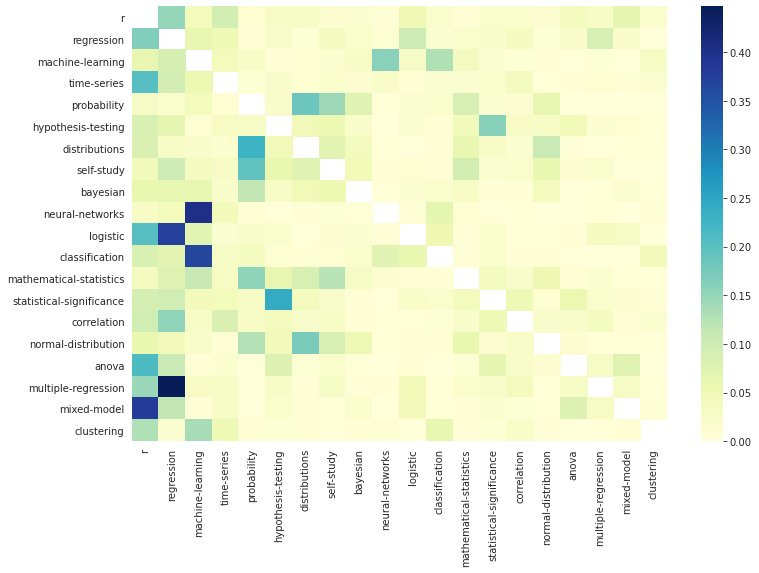

In [118]:
# Create a heatmap to visualize what percentage of the time popular tags are used together
for i in range(20):
  top_tags_percent.iloc[i,i] = np.NAN

top_tags_percent.drop(columns=['use_count'], inplace=True)

fig = plt.figure(figsize=(12,8))
sns.heatmap(top_tags_percent, cmap="YlGnBu")

The heatmap above helps visualize which popular Cross Validated tags are used together most often. Many of these are intuitive (i.e. the strong association between `hypothesis-testing` and `statistical-significance` or `neural-networks` and `machine-learning`). There does seem to be an interest in using `r` in order to perform analyses, including `time-series`, `mixed-model`, `anova`, `multiple-regression`, `regression`, and `clustering`, so we may want to address some of these topics in an r-based course.

## Summary, Recommendations, and Learnings

### Summary and Recommendations:

The goal of this project was to determine what the most popular topics are on Data Science Stack Exchange (DSSE), in order to recommend topics to create content and courses on. Based on the analysis in this project, I would recommend considering the following areas:


* **Deep learning and related topics and tools** (i.e. keras, neural networks): Deep learning related posts represent about 35% of all question posts on DSSE. This percentage increased rapidly from 2014-2017, and has held relatively steady since then. It is also important to note that while the percentage of deep learning posts has plateaued in the past few years, the number of these posts has continued to increase in tandem with the overall number of posts on DSSE. This indicates that interest in deep learning is not just a passing fad, but rather that demand for information on deep learning has continued to grow over the past 6 years. Since there appears to be a large and likely still growing demand for deep learning information, it may make sense to develop more deep learning related content.


* **Other popular but potentially undervalued topics:**
    * **Frequently viewed tags: Pandas, DataFrame, Numpy, Pytorch, and CSV.** All 5 of these topics were in the top 20 most viewed tags, however only Pandas was in the most used tags, although ranked further down the list. This may indicate that users are searching for information about these topics. It is possible that these may represent users newer to data science, who are just starting to work with the fundamental tools like popular python libraries (Pandas and Numpy), file types (i.e. CSV), and organizing data (DataFrames). These users could potentially be hesistant to post a basic question on DSSE, or may not be active members of the DSSE community, but rather coming to these posts through internet searches. It may be worth further investigating some data-science-for-beginners or intermediate level content and courses that focus on these practical skills.
    * **Frequently favorited tags: `image-classification`, `feature-selection`, `feature-engineering`, and `xgboost`.** These 4 tags in the are in the top 20 most favorited tags, but not in the top 20 most used tags. These topics are worth considering for content and course development, as users are demonstrating an interest in these topics by scoring them highly. There may be demand for more information on these topics, as users are favoriting these posts, potentially so that they can return to them as a reference.
    * **Highly scored tags: `image-classification`, `feature-selection`, and `data-mining`.** These 3 tags are in the top 20 most favorited tags but not in the top 20 most used tags. These topics are worth considering for content and course development, as it appears that users are responding favorably to these topics and value this information enough to favorite it. 
    * It is worth noting that **`image-classification` and `feature-selection`** are in both the top 20 scored and favorited lists, but not the top 20 most used tags list, so these topics may be undervalued and especially worth considering for content creation.
    * **Specific tag combinations**: As described in the Niche Tags section, there are certain tags that are more likely to appear together. This helps us identify content that may warrant a blog article, Youtube video, or module within a larger course. For example, 48% of the time the `word-embeddings` tag is used, it is used with `nlp`. If we are creating a course on Natural Language Processing, this topic would be important to include. In addition, we may want to highlight this topic in our course description or ads as a way to make our course stand out to potential customers.
    * **Statistics related topics**: A number of the top topics on DSSE are statistics related, and there was a fair amount of overlap with popular tags on Cross Validated. Given the demand for these topics on both forums, we may want to consider emphasizing the statistical skills when creating articles or courses on this content. In addition, we could consider developing courses or modules on some of the most popular Cross Validated topics, including:
        * **Time series analysis**, as this topic is ranked highly on both forums.
        * **A basic statistics overview** in the context of data analysis - popular tags include `probability`, `distributions`, `normal-distribution`, `correlation`, `regression`, and `statistical-significance`.
        * **R-based data analysis courses**, as r was a popular tag on both forums. Users seem to be interested in using r to to a variety of analyses (i.e. regression).
        * **Hypothesis testing and statistical significance**, in the context of data analysis. This could focus on specific fields where these skills are applied (i.e. healthcare, business).

### Learnings:
I had 3 main learnings from this project:

* Putting it all together - This project was a great way for me to practice putting together a lot of different skills, including: researching a topic, querying a database, working with timestamps, cleaning/reorganizing data, aggregating data, visualizations, and answering business questions.


* Groupby vs. Pivot Table: This project has helped me better understand how groupby and pivot_table are related, and gain fluency working with both functions. I also practiced using multiple aggregating functions. I am no longer afraid of 'breaking it' with these functions, and had fun playing around!


* Plotting and Visualizations: I really enjoyed stretching myself to get better at making graphs on this project! It was very satisfying to make and tweak the first heatmap, including using a mask. It took me a LONG time to get the line plot right - x axis labels were challenging - but I am getting better at understanding documentation and examples. I enjoyed using Seaborn to make the two toned horizontal bar graph. This project was also a good way to gain experience with deciding what types of visualization would be best to explain the data. 

## Notes

In [119]:
# For my own learning - another way to aggregate the same data, this time using a pivot table instead of groupby
time_pivot = pd.pivot_table(allq, index=['Year', 'Quarter'], aggfunc={'Deep_Learning': np.sum, 'Tags': lambda x: x.count()})
time_pivot['Percent_DL'] = round(time_pivot['Deep_Learning'] / time_pivot['Tags'] * 100, 2)
time_pivot

Deep_Learning  Tags  Percent_DL
Year Quarter                                 
2014 Q3                  13   189        6.88
     Q4                  21   216        9.72
2015 Q1                  18   190        9.47
     Q2                  28   284        9.86
     Q3                  45   311       14.47
     Q4                  64   382       16.75
2016 Q1                 106   516       20.54
     Q2                 107   518       20.66
     Q3                 153   585       26.15
     Q4                 164   527       31.12
2017 Q1                 224   698       32.09
     Q2                 209   647       32.30
     Q3                 229   714       32.07
     Q4                 333   898       37.08
2018 Q1                 521  1221       42.67
     Q2                 523  1448       36.12
     Q3                 637  1512       42.13
     Q4                 495  1294       38.25
2019 Q1                 708  1987       35.63
     Q2                 852  2393       35.60
     Q3                 848  2394       35.42
     Q4                 751  2036       36.89